In [32]:
#don't change this cell
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [33]:
#don't change this cell
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [34]:
#TODO
FILE_PATH = "/mnt/DE0A83560A832B1B/UNI/T6/Computational Intelgence/P1/wdbc.data"

In [35]:
#don't change this cell
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
df = pd.read_csv(FILE_PATH, header=None, names=column_names, usecols=range(1, 32))

df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

df.describe()

,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [36]:
# don't change this cell
X = df.drop(columns=["Diagnosis"]).values
y = df["Diagnosis"].values

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [37]:
#TODO
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
for x in train_loader:
    print(x)
    print("=================")

[tensor([[2.0290e+01, 1.4340e+01, 1.3510e+02, 1.2970e+03, 1.0030e-01, 1.3280e-01,
         1.9800e-01, 1.0430e-01, 1.8090e-01, 5.8830e-02, 7.5720e-01, 7.8130e-01,
         5.4380e+00, 9.4440e+01, 1.1490e-02, 2.4610e-02, 5.6880e-02, 1.8850e-02,
         1.7560e-02, 5.1150e-03, 2.2540e+01, 1.6670e+01, 1.5220e+02, 1.5750e+03,
         1.3740e-01, 2.0500e-01, 4.0000e-01, 1.6250e-01, 2.3640e-01, 7.6780e-02],
        [1.4500e+01, 1.0890e+01, 9.4280e+01, 6.4070e+02, 1.1010e-01, 1.0990e-01,
         8.8420e-02, 5.7780e-02, 1.8560e-01, 6.4020e-02, 2.9290e-01, 8.5700e-01,
         1.9280e+00, 2.4190e+01, 3.8180e-03, 1.2760e-02, 2.8820e-02, 1.2000e-02,
         1.9100e-02, 2.8080e-03, 1.5700e+01, 1.5980e+01, 1.0280e+02, 7.4550e+02,
         1.3130e-01, 1.7880e-01, 2.5600e-01, 1.2210e-01, 2.8890e-01, 8.0060e-02],
        [1.6240e+01, 1.8770e+01, 1.0880e+02, 8.0510e+02, 1.0660e-01, 1.8020e-01,
         1.9480e-01, 9.0520e-02, 1.8760e-01, 6.6840e-02, 2.8730e-01, 9.1730e-01,
         2.4640e+00, 2.80

In [38]:
#TODO
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.L1 = nn.Linear(input_size, 64)
        self.L2 = nn.Linear(64, 32)
        self.L3 = nn.Linear(32, 1)
        self.ReLU = nn.ReLU()
        self.Sigmoid = nn.Sigmoid()
        
        
    def forward(self, x):
        x = self.ReLU(self.L1(x))
        x = self.ReLU(self.L2(x))
        x = self.Sigmoid(self.L3(x))
        return x

In [39]:
#TODO
input_size = X_train.shape[1]
model = MLP(input_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
NUM_EPOCHS = 1

In [40]:
train_accuracy_list= []
test_accuracy_list= []

#TODO
for epoch in range(NUM_EPOCHS):
    model.train()
    total=0
    corrects= 0
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs= inputs.to(device)
        labels= labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        total += labels.size(0)
        predicted = (outputs > 0.5).float()
        corrects += (predicted == labels).sum().item()

    accuracy= corrects / total
    train_accuracy_list.append(accuracy)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {(running_loss / len(train_loader)):.4f}, Acurracy= {accuracy:.4f}")

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs= inputs.to(device)
            labels= labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > .5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    test_accuracy_list.append(accuracy)
    print(f"Test Accuracy: {accuracy:.4f}", end="\n\n")

Epoch 1/1, Loss: 4.7703, Acurracy= 0.4352
Test Accuracy: 0.6140



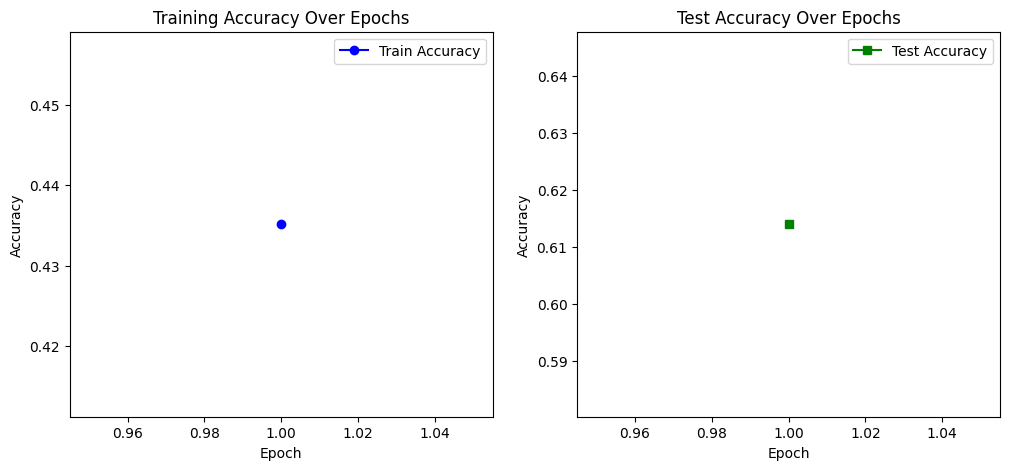

In [41]:
# don't change this cell
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, NUM_EPOCHS+1), train_accuracy_list, marker='o', linestyle='-', color='b', label="Train Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, NUM_EPOCHS+1), test_accuracy_list, marker='s', linestyle='-', color='g', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Over Epochs")
plt.legend()

plt.show()